In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
df = pd.read_csv("Netflix-Subscriptions.csv")
df.head(10)

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000
5,01/07/2014,47990000
6,01/10/2014,50650000
7,01/01/2015,54480000
8,01/04/2015,59620000
9,01/07/2015,62080000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  42 non-null     object
 1   Subscribers  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 804.0+ bytes


In [69]:
df['Time Period']=pd.to_datetime(df['Time Period'],format='%d/%m/%Y')
df.head(10)

,Time Period,Subscribers
0,2013-04-01,34240000
1,2013-07-01,35640000
2,2013-10-01,38010000
3,2014-01-01,41430000
4,2014-04-01,46130000
5,2014-07-01,47990000
6,2014-10-01,50650000
7,2015-01-01,54480000
8,2015-04-01,59620000
9,2015-07-01,62080000


#### Quarterly Subscription Growth of Netflix

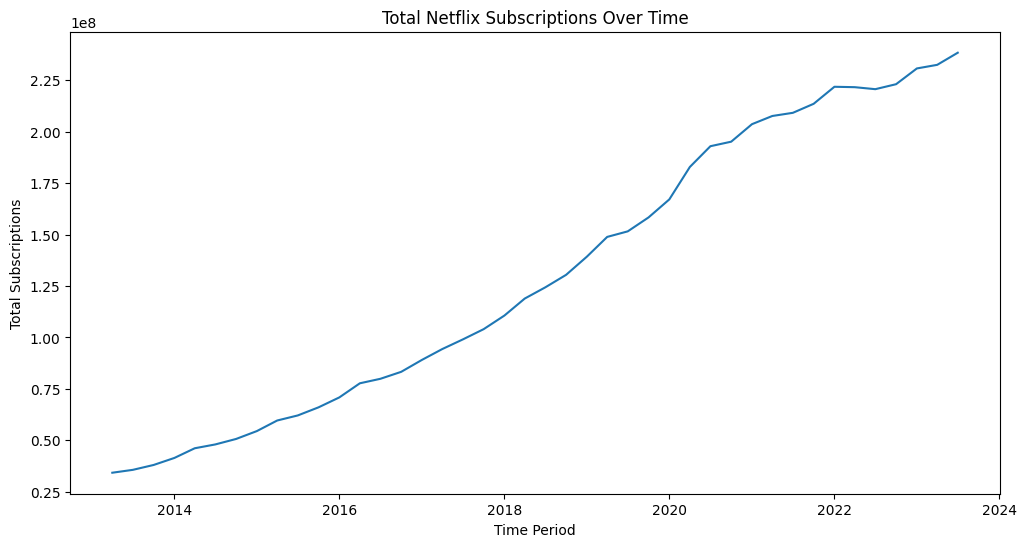

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time Period', y='Subscribers', data=df)
plt.title('Total Netflix Subscriptions Over Time')  
plt.xlabel("Time Period")
plt.ylabel("Total Subscriptions")
plt.show()

The growth of Netflix subscribers is not seasonal. Let's look at model's stationaity

In [71]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df['Subscribers'])
print('ADF Statistic:', results[0])
print('p-value:', results[1])
for key, value in results[4].items():
    print('Critical Value {}: {}'.format(key, value))


ADF Statistic: 0.20591078338329463
p-value: 0.9725911700133492
Critical Value 1%: -3.6055648906249997
Critical Value 5%: -2.937069375
Critical Value 10%: -2.606985625


Since P value > 0.05, fail to reject the null hypothesis — data is not stationary.

In [72]:
# Calculate the quartaly growth rate
df['Quarterly Growth Rate'] = df['Subscribers'].pct_change() * 100

In [73]:
#df['Bar clr']= np.where(df['Quarterly Growth Rate'] > 0, 'green', 'red')

df['Bar Color'] = df['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

In [74]:
df.head()

,Time Period,Subscribers,Quarterly Growth Rate,Bar Color
0,2013-04-01,34240000,NaN,red
1,2013-07-01,35640000,4.088785,green
2,2013-10-01,38010000,6.649832,green
3,2014-01-01,41430000,8.997632,green
4,2014-04-01,46130000,11.344436,green


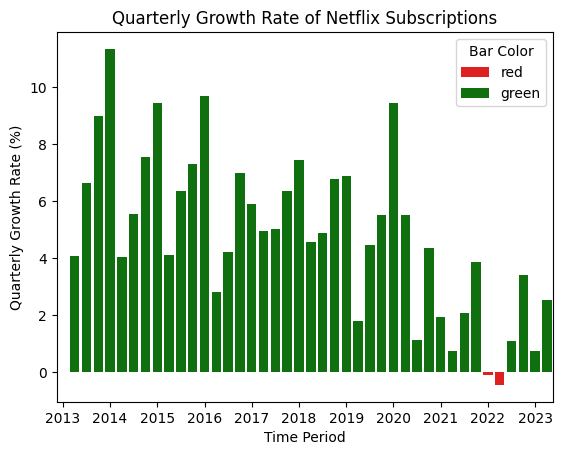

In [75]:
ax=sns.barplot(
    x='Time Period',
    y='Quarterly Growth Rate',
    hue='Bar Color',
    data=df,
    palette={'green': 'green', 'red': 'red'},
    dodge=False
    
)
ax.set_xticks(ax.get_xticks()[::4])  # Show 1 tick every 4 (1 per year)
ax.set_xticklabels(df['Time Period'].dt.year[::4])

plt.title('Quarterly Growth Rate of Netflix Subscriptions')
plt.xlabel("Time Period")
plt.ylabel("Quarterly Growth Rate (%)")
plt.show()

In [76]:
#Yearly growth rate
df['Year']= df['Time Period'].dt.year
Yearly_Growth= df.groupby('Year')['Subscribers'].sum()
#Yearly_Growth_Rate= df.groupby('Year')['Subscribers'].pct_change().fillna(0)*100
df['Yearly_Growth_Rate']= df.groupby('Year')['Subscribers'].pct_change().fillna(0)*100


In [77]:
Yearly_Growth

Year
2013    107890000
2014    186200000
2015    242200000
2016    311730000
2017    386510000
2018    484310000
2019    598010000
2020    738050000
2021    834040000
2022    887240000
2023    701640000
Name: Subscribers, dtype: int64

In [78]:
df.head(10)

,Time Period,Subscribers,Quarterly Growth Rate,Bar Color,Year,Yearly_Growth_Rate
0,2013-04-01,34240000,NaN,red,2013,0.000000
1,2013-07-01,35640000,4.088785,green,2013,4.088785
2,2013-10-01,38010000,6.649832,green,2013,6.649832
3,2014-01-01,41430000,8.997632,green,2014,0.000000
4,2014-04-01,46130000,11.344436,green,2014,11.344436
5,2014-07-01,47990000,4.032083,green,2014,4.032083
6,2014-10-01,50650000,5.542821,green,2014,5.542821
7,2015-01-01,54480000,7.561698,green,2015,0.000000
8,2015-04-01,59620000,9.434655,green,2015,9.434655
9,2015-07-01,62080000,4.126132,green,2015,4.126132


In [79]:
#df['Bar clr']= np.where(df['Quarterly Growth Rate'] > 0, 'green', 'red')

df['Bar Color_Y'] = df['Yearly_Growth_Rate'].apply(lambda x: 'green' if x > 0 else 'red')

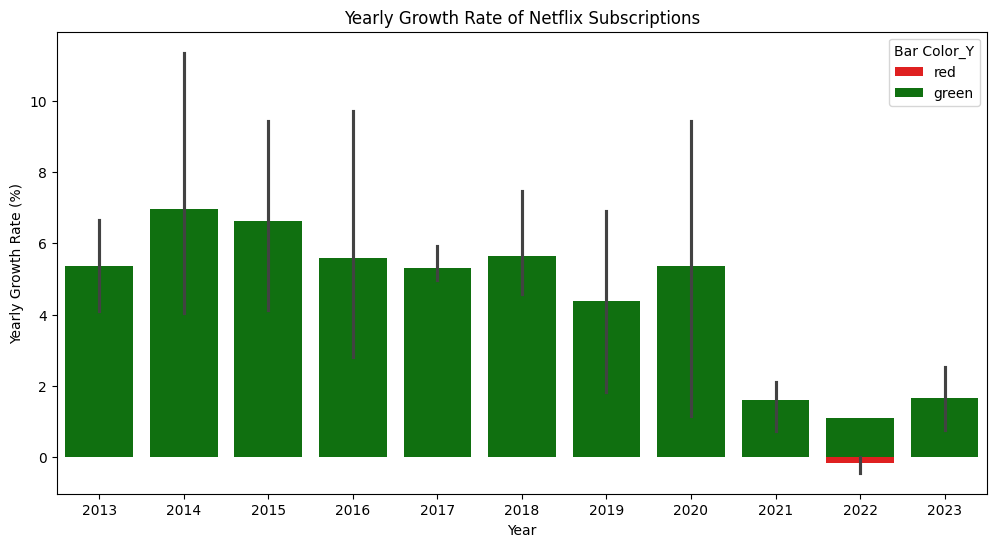

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Year',
    y='Yearly_Growth_Rate',
    hue='Bar Color_Y',
    data=df,
    palette={'green': 'green', 'red': 'red'},
    dodge=False
    
)
#ax.set_xticks(ax.get_xticks()[::4])  # Show 1 tick every 4 (1 per year)
#ax.set_xticklabels(df['Year'].dt.year[::4])

plt.title('Yearly Growth Rate of Netflix Subscriptions')
plt.xlabel("Year")
plt.ylabel("Yearly Growth Rate (%)")
plt.show()

### Using ARIMA for Forecasting Netflix Quarterly Subscriptions

In [81]:
time_series = df.set_index('Time Period')['Subscribers']

In [82]:
time_series

Time Period
2013-04-01     34240000
2013-07-01     35640000
2013-10-01     38010000
2014-01-01     41430000
2014-04-01     46130000
2014-07-01     47990000
2014-10-01     50650000
2015-01-01     54480000
2015-04-01     59620000
2015-07-01     62080000
2015-10-01     66020000
2016-01-01     70840000
2016-04-01     77710000
2016-07-01     79900000
2016-10-01     83280000
2017-01-01     89090000
2017-04-01     94360000
2017-07-01     99040000
2017-10-01    104020000
2018-01-01    110640000
2018-04-01    118900000
2018-07-01    124350000
2018-10-01    130420000
2019-01-01    139260000
2019-04-01    148860000
2019-07-01    151560000
2019-10-01    158330000
2020-01-01    167090000
2020-04-01    182860000
2020-07-01    192950000
2020-10-01    195150000
2021-01-01    203660000
2021-04-01    207640000
2021-07-01    209180000
2021-10-01    213560000
2022-01-01    221840000
2022-04-01    221640000
2022-07-01    220670000
2022-10-01    223090000
2023-01-01    230750000
2023-04-01    232500000
2023

In [84]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(time_series)
print('ADF Statistic:', results[0])
print('p-value:', results[1])
for key, value in results[4].items():
    print('Critical Value {}: {}'.format(key, value))


ADF Statistic: 0.20591078338329463
p-value: 0.9725911700133492
Critical Value 1%: -3.6055648906249997
Critical Value 5%: -2.937069375
Critical Value 10%: -2.606985625


p value > 0.05, fail to  reject null hypothisis. Therefore data set is non stationary

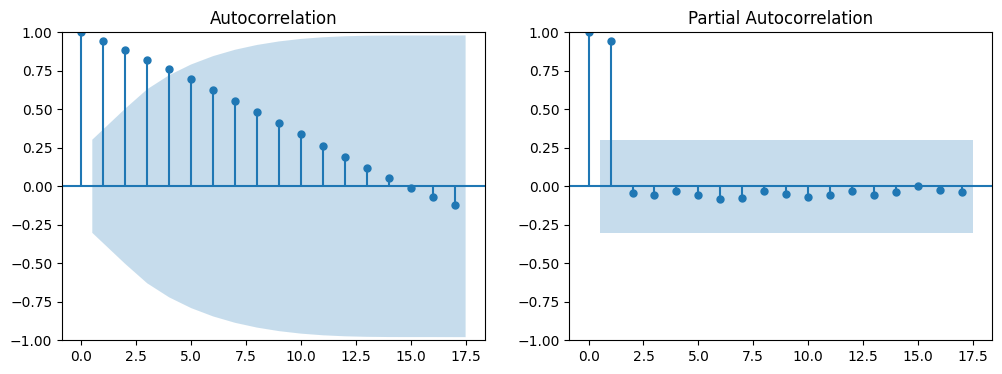

In [85]:
# Plotting the ACF and PACF to check for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(time_series, ax=axes[0])
plot_pacf(time_series, ax=axes[1])
plt.show()

In [87]:
# to make the model stationary, we can take the first difference
time_series_diff = time_series.diff().dropna()
time_series_diff.head()

Time Period
2013-07-01    1400000.0
2013-10-01    2370000.0
2014-01-01    3420000.0
2014-04-01    4700000.0
2014-07-01    1860000.0
Name: Subscribers, dtype: float64

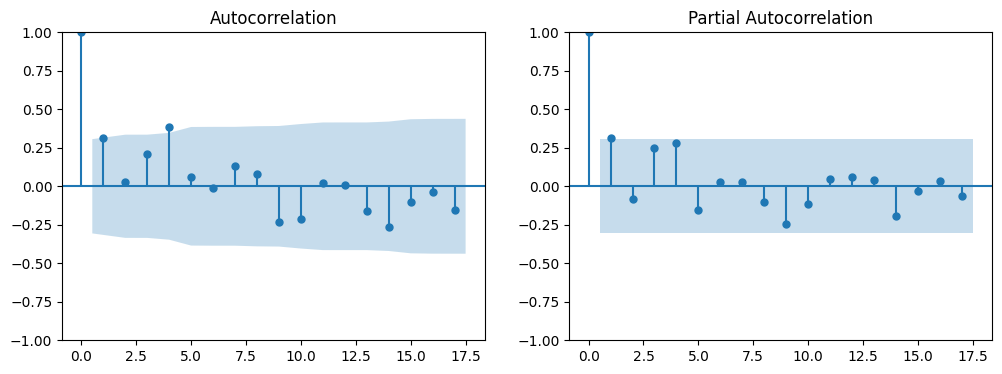

In [88]:
#plot acf and pcf of the differenced series
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
plot_acf(time_series_diff, ax=axes[0])
plot_pacf(time_series_diff, ax=axes[1])
plt.show()

In [89]:
#potential order of the AR and MA components in the time series
# p=1 , q=1 , d=1

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Singer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\Singer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\Singer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Fri, 06 Jun 2025   AIC                           1351.986
Time:                        13:13:22   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     81.106      0.000       0.976       1.024
ma.L1         -0.9909      0.222     -4.473      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.54e+26      0.0

In [95]:
future_steps = 10
predictions = model_fit.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)

In [96]:
predictions

2023-10-01    243321711
2024-01-01    248252166
2024-04-01    253181366
2024-07-01    258109311
2024-10-01    263036002
2025-01-01    267961438
2025-04-01    272885620
2025-07-01    277808549
2025-10-01    282730224
2026-01-01    287650646
Freq: QS-OCT, Name: predicted_mean, dtype: int32

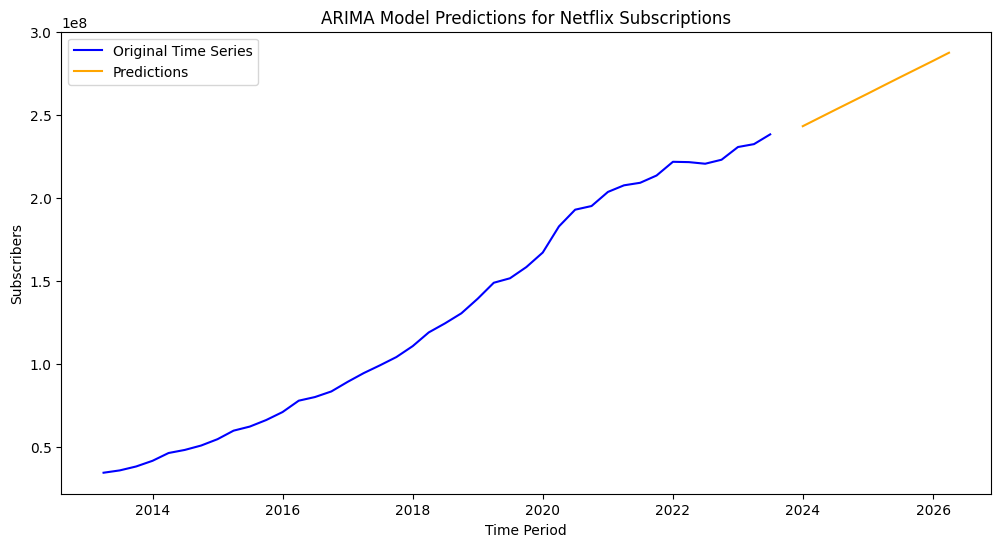

In [97]:
#plot the original time series and the predictions
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.plot(pd.date_range(start=time_series.index[-1], periods=future_steps + 1, freq='Q')[1:], predictions, label='Predictions', color='orange')
plt.title('ARIMA Model Predictions for Netflix Subscriptions')
plt.xlabel('Time Period')
plt.ylabel('Subscribers')
plt.legend()
plt.show()
